# Development cut_resample

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

In [2]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

number of processors: 8


In [3]:
from diffractio.utils_math import ndgrid
from diffractio.utils_optics import field_parameters
from scipy.interpolate import RegularGridInterpolator

In [4]:
from matplotlib import rcParams
rcParams['figure.dpi']=200
rcParams['font.size']=14

In [5]:
x0=np.linspace(-200*um, 200*um, 128)
y0=np.linspace(-200*um, 200*um, 128)
z0=np.linspace(1*mm, 2*mm, 32)

wavelength=532*nm

In [6]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=130*um, z0=0, A=1, theta=0.0)

In [7]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.inverse_amplitude()

u1=u0*obstacle

In [8]:
u_xyz=Scalar_field_XYZ(x0,y0,z0,wavelength)

In [9]:
u_xyz.incident_field(u1)

In [10]:
u_xyz.RS()

time in RS= 1.110901117324829. num proc= 6


1.110901117324829

intensity=np.abs(u_xyz.u)**2

## function

In [11]:
u_xyz_r=u_xyz.cut_resample(num_points=(128,128,128),new_field=True)


In [13]:
u_xyz_r.draw_intensityXYZ()

Close the window to continue.


## development

In [12]:
amplitude, intensity, phase = field_parameters(u_xyz.u)

x0=u_xyz.x
y0=u_xyz.y
z0=u_xyz.z 

In [13]:
interpolated_amplitude = RegularGridInterpolator((x0, y0, z0), amplitude)
interpolated_phase = RegularGridInterpolator((x0,y0,z0), phase)

In [14]:
len_x0=256
len_y0=128
len_z0=max(len(x0), len(y0))

x_new=np.linspace(x0[0],x0[-1],len_x0)
y_new=np.linspace(y0[0],y0[-1],len_y0)
z_new=np.linspace(z0[0],z0[-1],len_z0)

u_xyz_interpolated=Scalar_field_XYZ(x_new,y_new,z_new,wavelength)

In [15]:
X_new=u_xyz_interpolated.X
Y_new=u_xyz_interpolated.Y
Z_new=u_xyz_interpolated.Z

amplitude_new=interpolated_amplitude((X_new,Y_new,Z_new))
phase_new=interpolated_phase((X_new,Y_new,Z_new))

In [16]:
u_xyz_interpolated.u=amplitude_new*np.exp(1j*phase_new)

u_xyz_interpolated.u=field_new

u_xyz.X=X_new
u_xyz.Y=Y_new
u_xyz.Z=Z_new
u_xyz.x=x0
u_xyz.y=y0
u_xyz.z=z0

u_xyz.u=field_new

In [17]:
u_xyz.draw_intensityXYZ()

Close the window to continue.


In [18]:
u_xyz_interpolated.draw_intensityXYZ()

Close the window to continue.


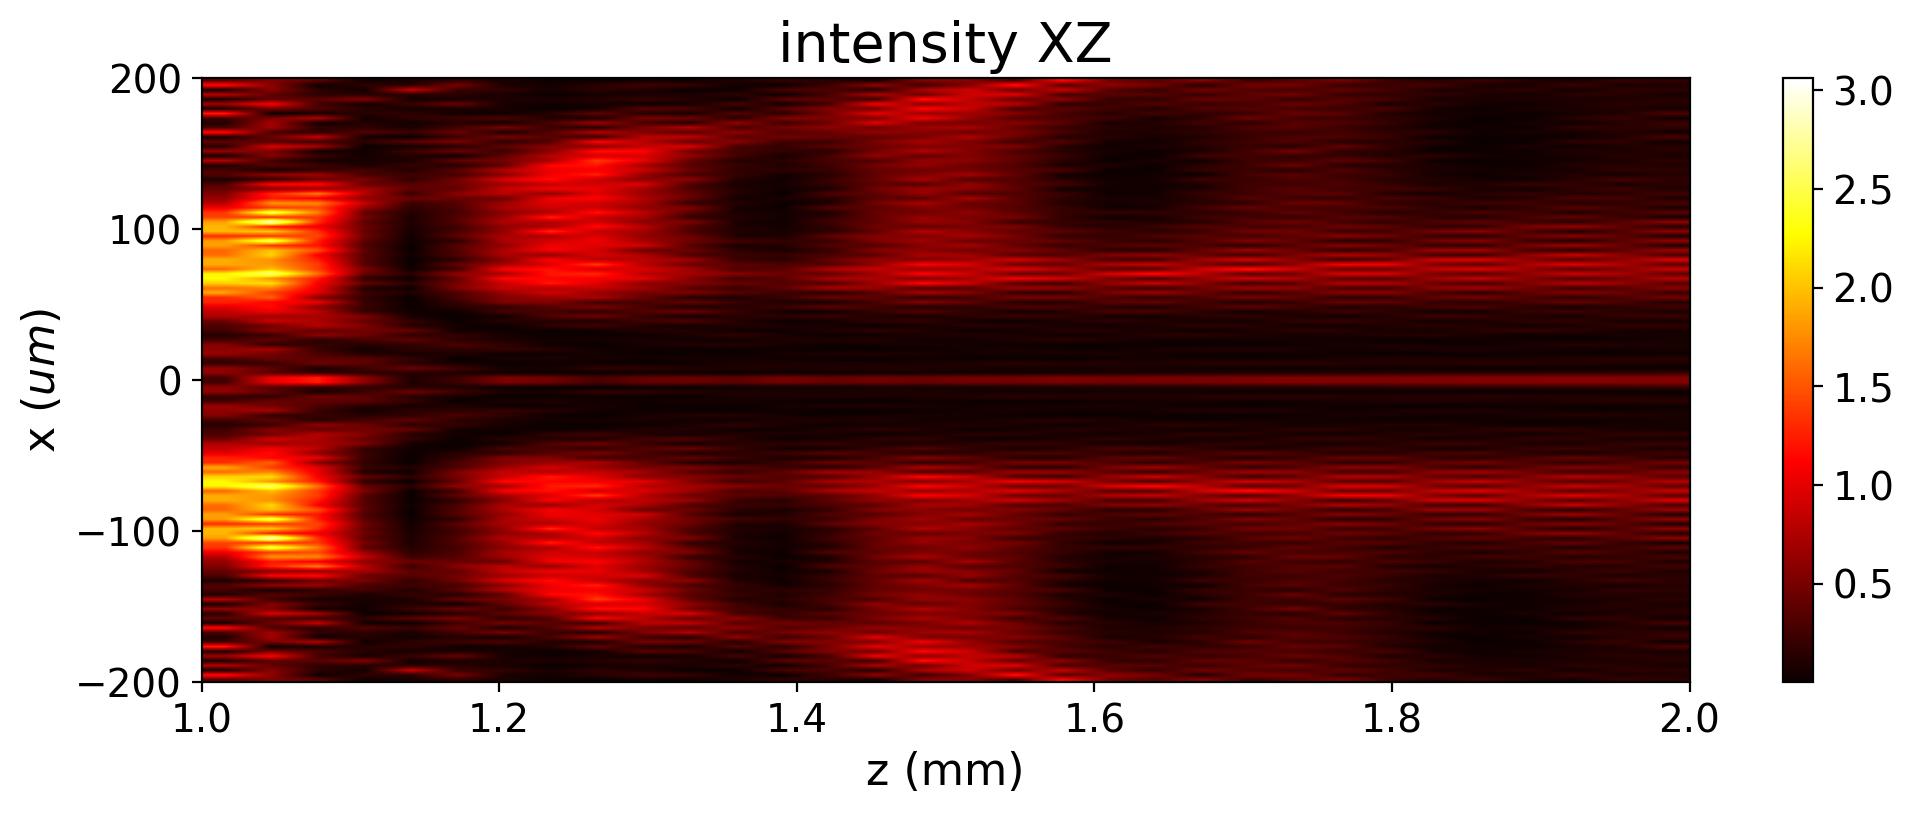

In [19]:
u_xyz.draw_intensityXZ(y0=0)
fig=plt.gcf()
fig.set_size_inches(12,4)

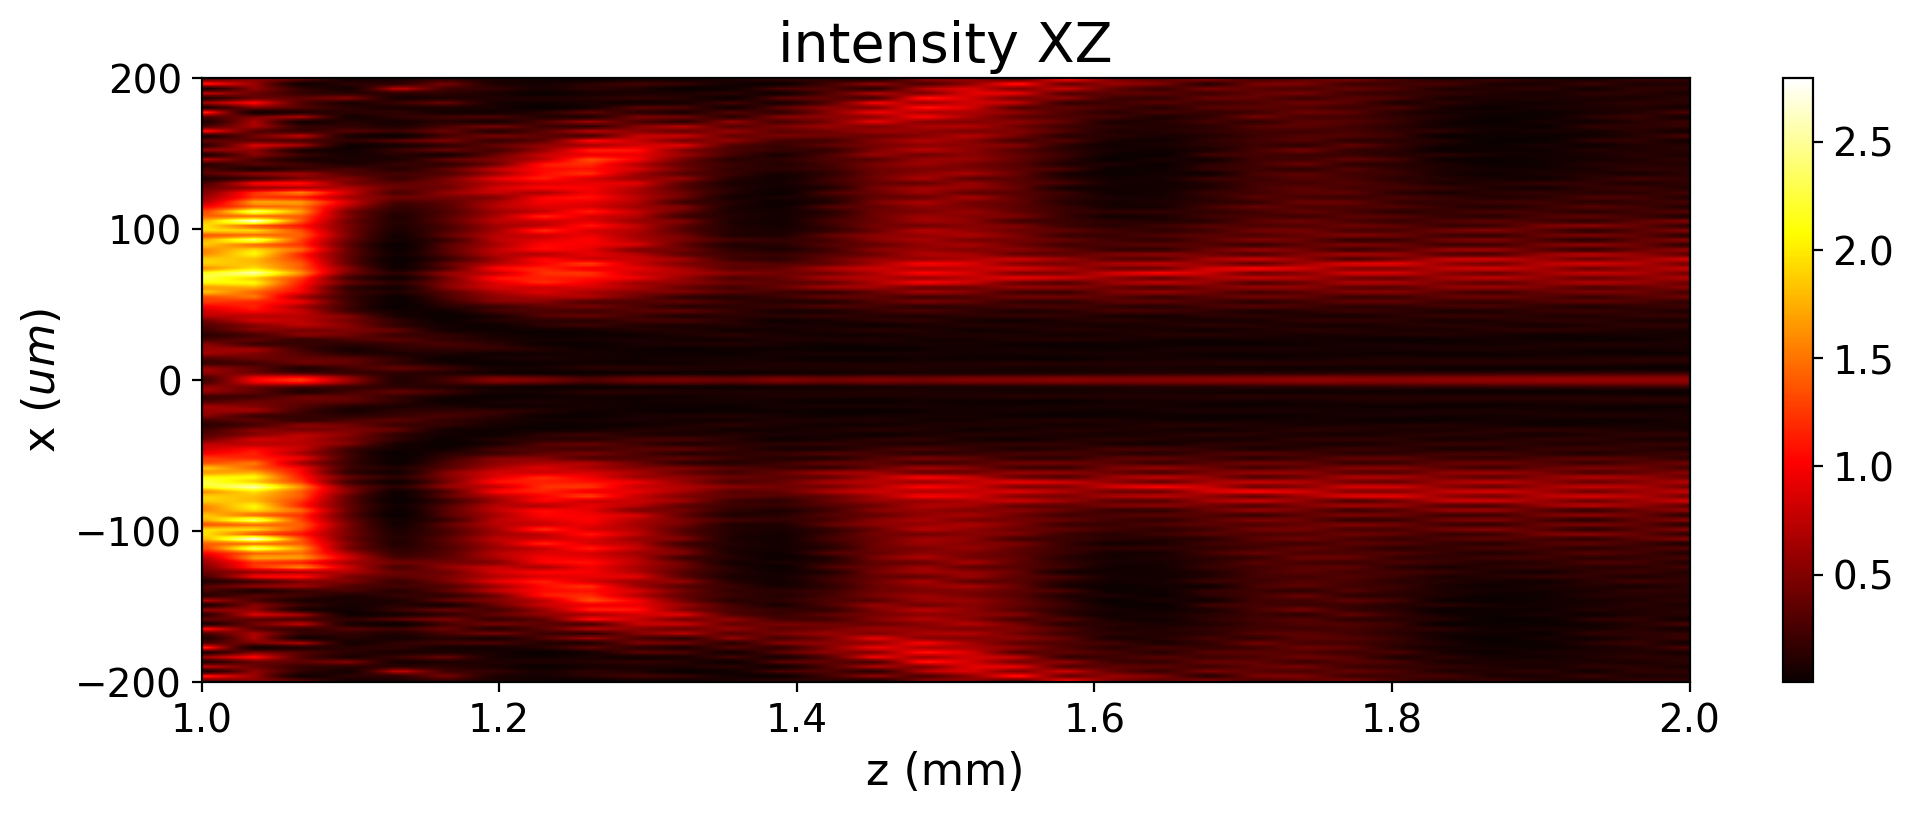

In [20]:
u_xyz_interpolated.draw_intensityXZ(y0=0)
fig=plt.gcf()
fig.set_size_inches(12,4)